# Copying images training, validation and test directories

In [1]:
import os,shutil

In [2]:
base_dir = "/content/sample_data/cats_and_dogs_small"
os.mkdir(base_dir)

In [3]:
# train directory
train_dir = os.path.join(base_dir,"train")
os.mkdir(train_dir)

# validation directory
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

# test directory
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# train cats directory
train_cats_dir = os.path.join(train_dir,"cats")
os.mkdir(train_cats_dir)

# train dogs directory
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# validation cats directory
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

# validation dogs directory
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

# test cats directory
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# test dogs directory
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [4]:
# copies the first 1000 cat images to train_cats_dir
c_train = os.listdir("/content/sample_data/kaggle_dataset/Cat")
fnames = c_train[:1000]
fnames2 = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname,fname2 in zip(fnames,fnames2):
     src = os.path.join("/content/sample_data/kaggle_dataset/Cat",fname)
     dst = os.path.join(train_cats_dir,fname2)
     shutil.copyfile(src,dst)
# /content/sample_data/kaggle_dataset/Cat/0.jpg

In [5]:
# copies the next 500 cat images to validation_cats_dir
fnames = c_train[1000:1500]
fnames2 = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname,fname2 in zip(fnames,fnames2):
     src = os.path.join('/content/sample_data/kaggle_dataset/Cat',fname)
     dst = os.path.join(validation_cats_dir,fname2)
     shutil.copyfile(src,dst)

In [6]:
# copies the next 500 cat images to test_cats_dir
fnames = c_train[1500:2000]
fnames2 = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname,fname2 in zip(fnames,fnames2):
     src = os.path.join('/content/sample_data/kaggle_dataset/Cat',fname)
     dst = os.path.join(test_cats_dir,fname2)
     shutil.copyfile(src,dst)

In [7]:
# copies the first 1000 dog images to train_dogs_dir
d_train = os.listdir("/content/sample_data/kaggle_dataset/Dog")
fnames = d_train[:1000]
fnames2 = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname,fname2 in zip(fnames,fnames2):
     src = os.path.join('/content/sample_data/kaggle_dataset/Dog',fname)
     dst = os.path.join(train_dogs_dir,fname2)
     shutil.copyfile(src,dst)

In [8]:
# copies the next 500 dog images to validation_dogs_dir
fnames = d_train[1000:1500]
fnames2 = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname,fname2 in zip(fnames,fnames2):
     src = os.path.join('/content/sample_data/kaggle_dataset/Dog',fname)
     dst = os.path.join(validation_dogs_dir,fname2)
     shutil.copyfile(src,dst)

In [9]:
# copies the next 500 dog images to test_dogs_dir
fnames = d_train[1500:2000]
fnames2 = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname,fname2 in zip(fnames,fnames2):
     src = os.path.join('/content/sample_data/kaggle_dataset/Dog',fname)
     dst = os.path.join(test_dogs_dir,fname2)
     shutil.copyfile(src,dst)

In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Instantiating a small convnet for dogs vs. cats classfication

In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

# Configuring the model for training

In [13]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate =1e-4),
              metrics = ['acc'])

# Using ImageDataGenerator to read images from directories

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    # binary label used because we used binary_crossentropy loss
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
def generator():
  i = 0
  while True:
    i += 1
    yield i


for item in generator():
  print(item)
  if item > 4:
    break

1
2
3
4
5


In [16]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fitting the model using a batch generator

In [23]:
history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.9939 - loss: 0.0348 - val_acc: 0.7320 - val_loss: 0.8897
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - acc: 0.9850 - loss: 0.0455 - val_acc: 0.7370 - val_loss: 0.9318
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - acc: 0.9979 - loss: 0.0211 - val_acc: 0.7390 - val_loss: 0.9846
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - acc: 0.9922 - loss: 0.0273 - val_acc: 0.7370 - val_loss: 1.0284
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - acc: 0.9955 - loss: 0.0193 - val_acc: 0.7250 - val_loss: 1.2822
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - acc: 0.9986 - loss: 0.0174 - val_acc: 0.7100 - val_loss: 1.4627
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - acc: 0.9968 - loss: 0.0161 - val_acc: 0.7460 - val_loss: 1.1398
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - acc: 0.9973 - loss: 0.0122 - val_acc: 0.7340 - val_loss: 1.1644
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 5

# Saving the model

In [24]:
model.save("cats_and_dogs_small.keras")


# Displaying curves of loss and accuracy during training

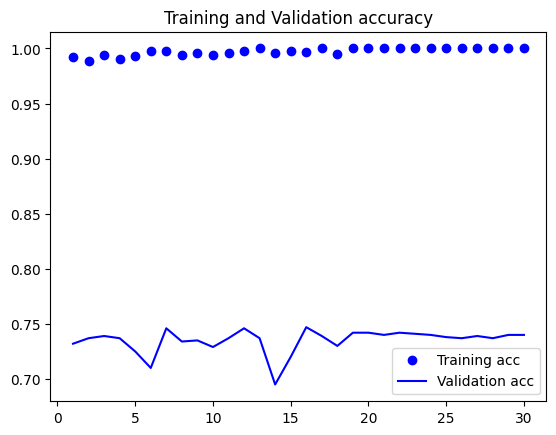

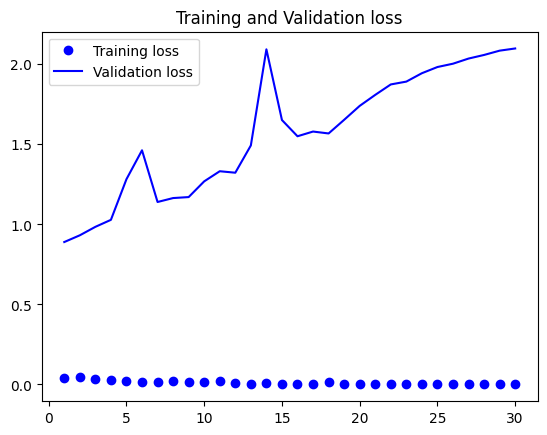

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()